
# DATA VIZ J_COMPONENT


# VISHWA SHAH(19BCE0753), PRANAY KUMAWAT (19BCE2244)

# Load the data

In [1]:
import numpy as np 
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("C:/Desktop/weatherAUS.csv")

In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Data Preprocessing

In [4]:
zeros_cnt = df.isnull().sum().sort_values(ascending=False)
percent_zeros = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([zeros_cnt, percent_zeros], axis=1, keys=['Total', 'Percent'])
missing_data
#missing_data.T

,Total,Percent
Sunshine,69835,0.480098
Evaporation,62790,0.431665
Cloud3pm,59358,0.408071
Cloud9am,55888,0.384216
Pressure9am,15065,0.103568
Pressure3pm,15028,0.103314
WindDir9am,10566,0.072639
WindGustDir,10326,0.070989
WindGustSpeed,10263,0.070555
Humidity3pm,4507,0.030984


In [5]:
#Let's drop those features where the missing/total coefficient is higher than 15%.

In [6]:
dropList = list(missing_data[missing_data['Percent'] > 0.15].index)
dropList
df.drop(dropList, axis=1, inplace=True)

In [7]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [8]:
#df.head()
df.shape

(145460, 19)

In [9]:
 #A pairplot helps visualize dependencies and correlation between features. Some of them have quite obvious links.

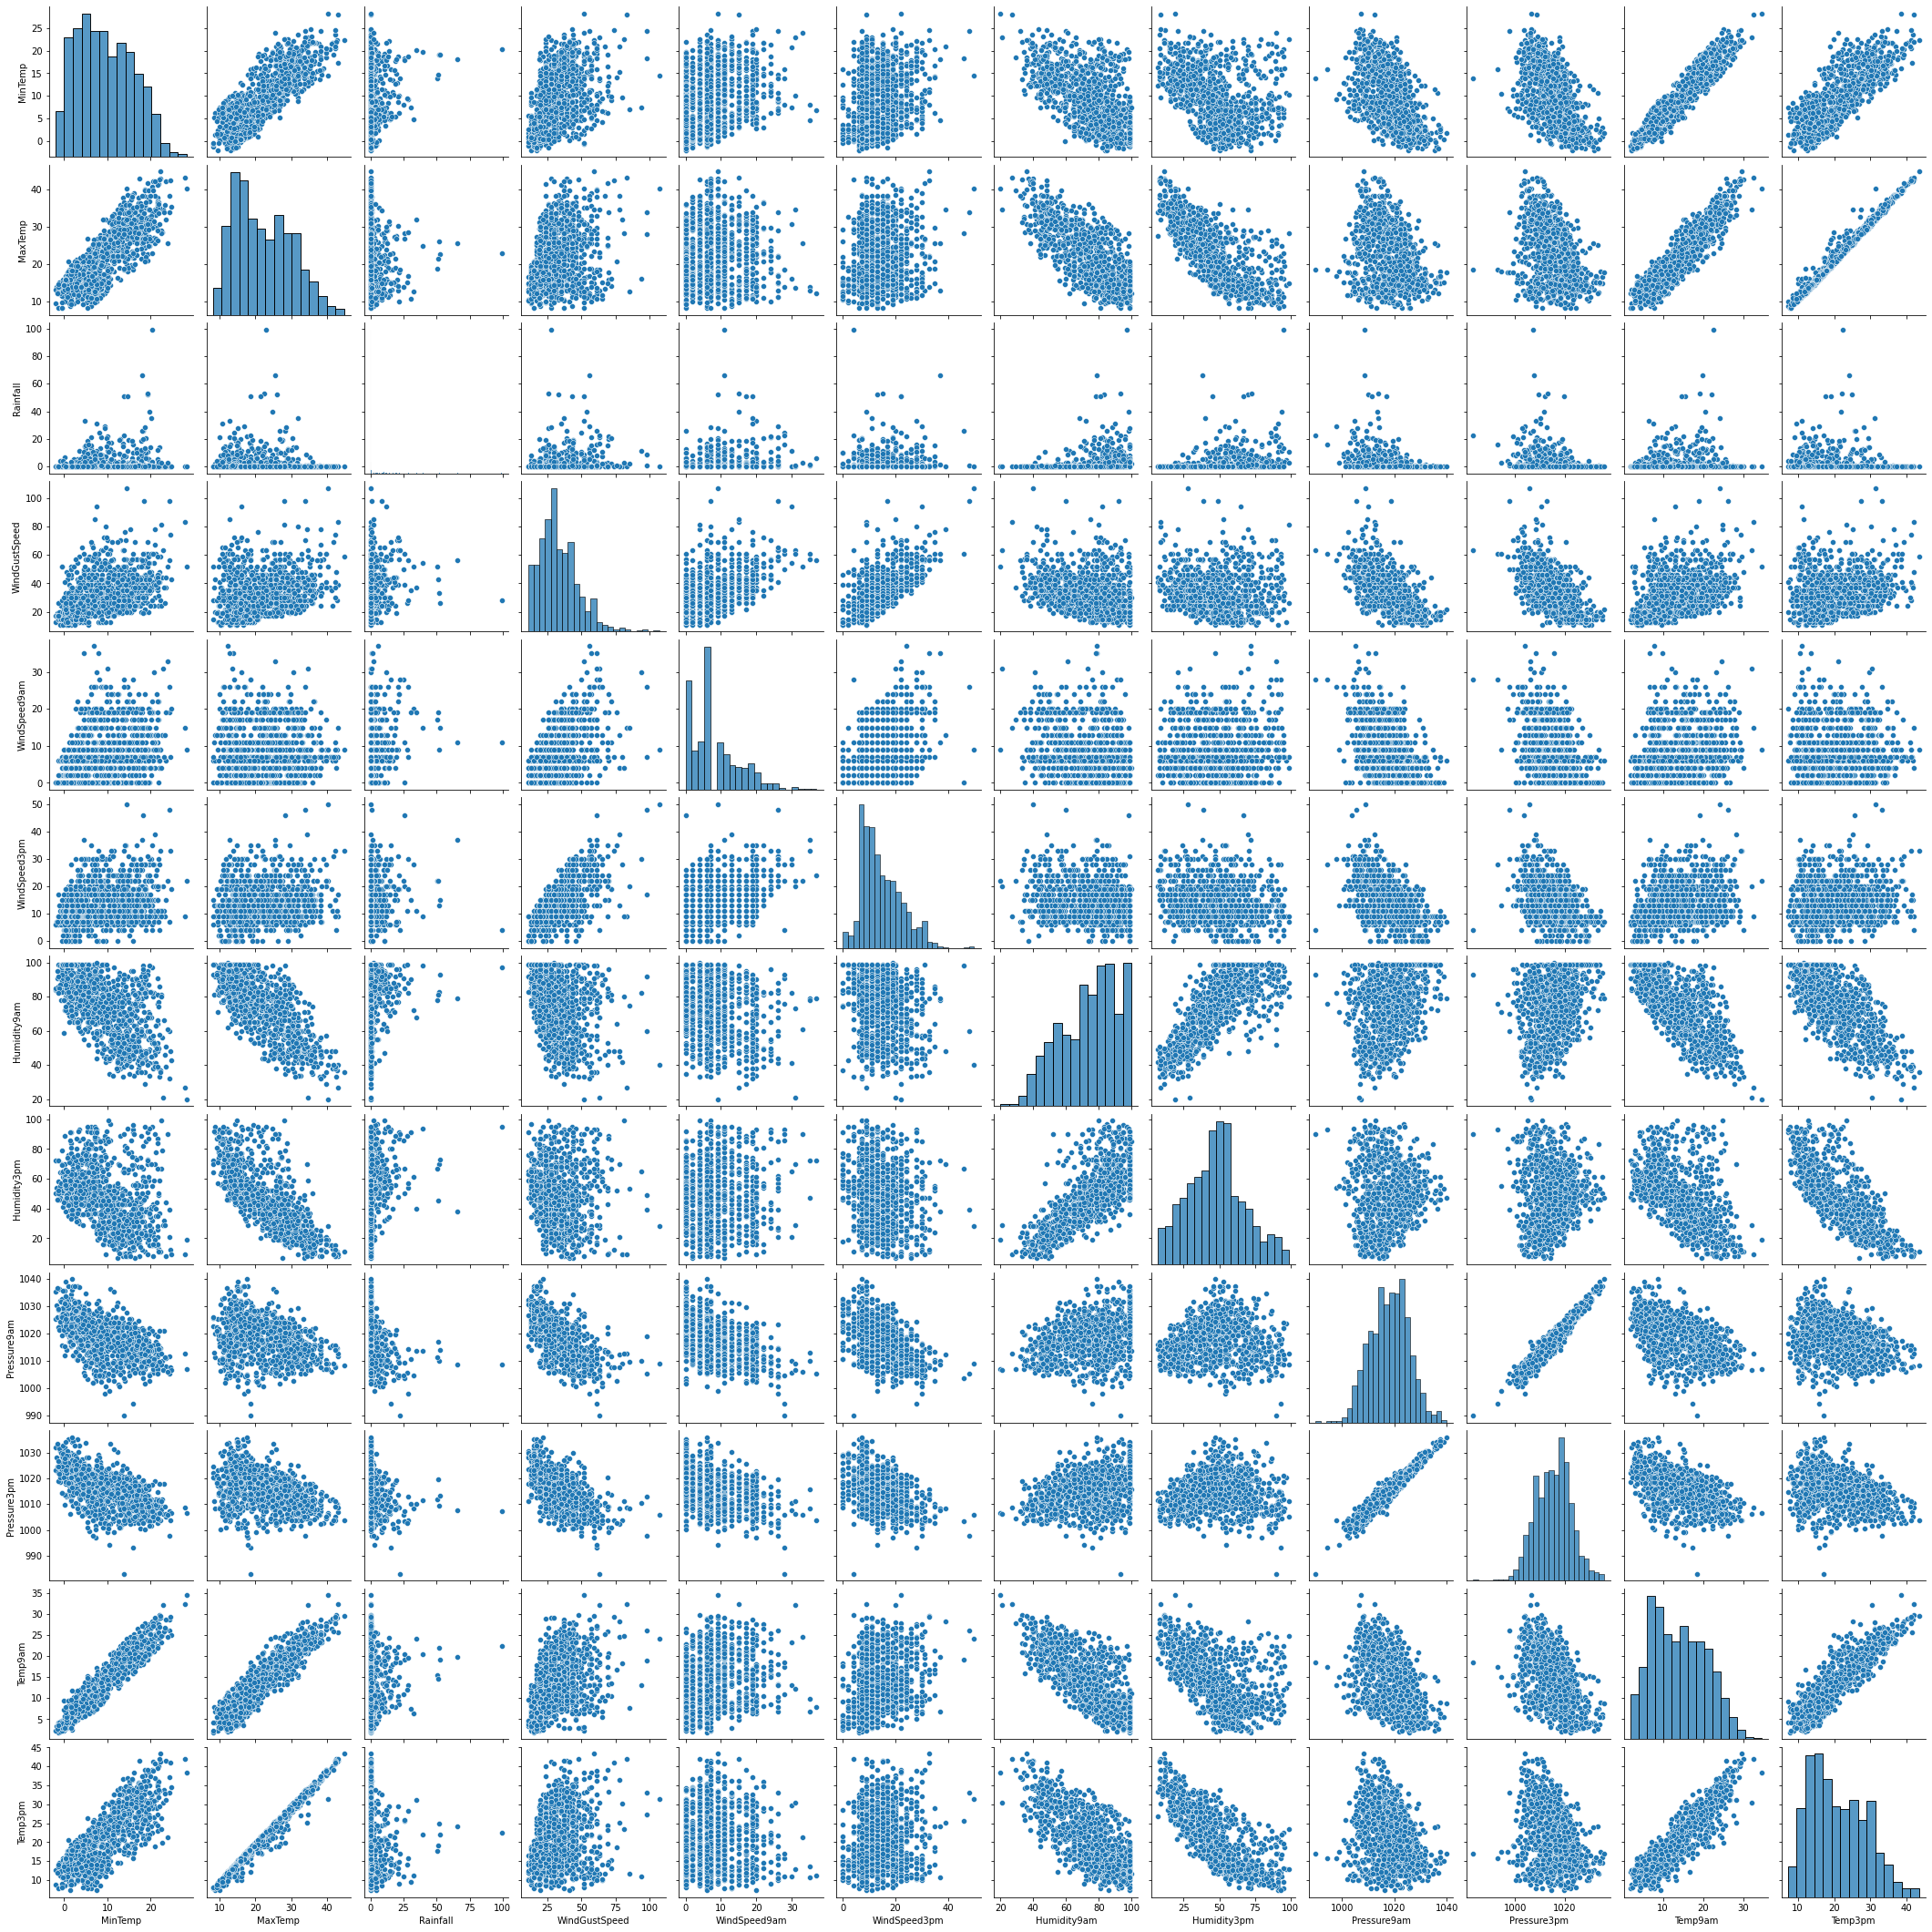

In [10]:
sns.pairplot(df[:1000])

In [11]:
df.head()
df.drop(['Date'], axis=1, inplace=True)
df.drop(['Location'], axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   WindGustDir    135134 non-null  object 
 4   WindGustSpeed  135197 non-null  float64
 5   WindDir9am     134894 non-null  object 
 6   WindDir3pm     141232 non-null  object 
 7   WindSpeed9am   143693 non-null  float64
 8   WindSpeed3pm   142398 non-null  float64
 9   Humidity9am    142806 non-null  float64
 10  Humidity3pm    140953 non-null  float64
 11  Pressure9am    130395 non-null  float64
 12  Pressure3pm    130432 non-null  float64
 13  Temp9am        143693 non-null  float64
 14  Temp3pm        141851 non-null  float64
 15  RainToday      142199 non-null  object 
 16  RainTomorrow   142193 non-null  object 
dtypes: float64(12), object(5)
mem

In [13]:
#Let's encode categorical features using one-hot-encoding.

In [14]:
ohe = pd.get_dummies(data=df, columns=['WindGustDir','WindDir9am','WindDir3pm'])
ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 62 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MinTemp          143975 non-null  float64
 1   MaxTemp          144199 non-null  float64
 2   Rainfall         142199 non-null  float64
 3   WindGustSpeed    135197 non-null  float64
 4   WindSpeed9am     143693 non-null  float64
 5   WindSpeed3pm     142398 non-null  float64
 6   Humidity9am      142806 non-null  float64
 7   Humidity3pm      140953 non-null  float64
 8   Pressure9am      130395 non-null  float64
 9   Pressure3pm      130432 non-null  float64
 10  Temp9am          143693 non-null  float64
 11  Temp3pm          141851 non-null  float64
 12  RainToday        142199 non-null  object 
 13  RainTomorrow     142193 non-null  object 
 14  WindGustDir_E    145460 non-null  uint8  
 15  WindGustDir_ENE  145460 non-null  uint8  
 16  WindGustDir_ESE  145460 non-null  uint

In [15]:
from sklearn import preprocessing
from numpy import array

ohe['RainToday'] = df['RainToday'].astype(str)
ohe['RainTomorrow'] = df['RainTomorrow'].astype(str)

lb = preprocessing.LabelBinarizer()

ohe['RainToday'] = lb.fit_transform(ohe['RainToday'])
ohe['RainTomorrow'] = lb.fit_transform(ohe['RainTomorrow'])

In [16]:
ohe = ohe.dropna()
#ohe.drop('Location', axis=1, inplace=True)
y = ohe['RainTomorrow']
X = ohe.drop(['RainTomorrow'], axis=1)

# Model Building

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84266 entries, 115490 to 82879
Data columns (total 61 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MinTemp          84266 non-null  float64
 1   MaxTemp          84266 non-null  float64
 2   Rainfall         84266 non-null  float64
 3   WindGustSpeed    84266 non-null  float64
 4   WindSpeed9am     84266 non-null  float64
 5   WindSpeed3pm     84266 non-null  float64
 6   Humidity9am      84266 non-null  float64
 7   Humidity3pm      84266 non-null  float64
 8   Pressure9am      84266 non-null  float64
 9   Pressure3pm      84266 non-null  float64
 10  Temp9am          84266 non-null  float64
 11  Temp3pm          84266 non-null  float64
 12  RainToday        84266 non-null  int32  
 13  WindGustDir_E    84266 non-null  uint8  
 14  WindGustDir_ENE  84266 non-null  uint8  
 15  WindGustDir_ESE  84266 non-null  uint8  
 16  WindGustDir_N    84266 non-null  uint8  
 17  WindGus

In [20]:
param_grid = { 
   'n_estimators': [100, 200],
   'max_features': ['auto'],
   'max_depth' : [4,5,8,10],
   'criterion' :['gini', 'entropy']
}
RFC = RandomForestClassifier()

cv_RFC = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=2)
cv_RFC.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 8, 10], 'max_features': ['auto'],
                         'n_estimators': [100, 200]})

In [21]:
cv_RFC.best_params_
sorted(zip(cv_RFC.best_estimator_.feature_importances_,ohe.columns))

[(0.0004994708089321459, 'WindDir9am_WSW'),
 (0.0005128687285365533, 'WindDir3pm_ENE'),
 (0.000552286037032318, 'WindDir9am_E'),
 (0.0005628621814154917, 'WindGustDir_E'),
 (0.0005741573619971899, 'WindGustDir_ENE'),
 (0.0005815022101876011, 'WindDir3pm_E'),
 (0.0005843788046305241, 'WindGustDir_SE'),
 (0.000655622016114789, 'WindGustDir_S'),
 (0.000661130046412735, 'WindDir3pm_S'),
 (0.000684629891289259, 'WindDir9am_SSW'),
 (0.0007246754451434503, 'WindDir9am_W'),
 (0.0007895766376568237, 'WindDir9am_N'),
 (0.0008066571713547515, 'WindGustDir_SSE'),
 (0.0008089810451373299, 'WindDir9am_WNW'),
 (0.0008218138675499483, 'WindDir9am_SSE'),
 (0.0008259683976078804, 'WindGustDir_WNW'),
 (0.0008292216873946536, 'WindGustDir_WSW'),
 (0.0008294676708957662, 'WindDir3pm_SE'),
 (0.0008322307509293613, 'WindGustDir_SSW'),
 (0.0008351824307538013, 'WindDir9am_SE'),
 (0.0008584781809199526, 'WindDir9am_SW'),
 (0.0008658470069218275, 'WindDir3pm_SSW'),
 (0.0008715112269988336, 'WindDir9am_NW'),
 (0

In [22]:
pipe = Pipeline([('scaler', StandardScaler()), ('RFC', RandomForestClassifier(criterion='gini', 
                                                                              max_depth=10, 
                                                                              max_features='auto',
                                                                              n_estimators=200))])

In [23]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RFC',
                 RandomForestClassifier(max_depth=10, n_estimators=200))])

# Model Evaluation

In [24]:
pipe.score(X_train, y_train)

0.8586499893195357

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=3)

array([0.83325442, 0.84120418, 0.84115433])

In [26]:
y_pred = pipe.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.8470441644745951

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

#recall_score(y_test, y_pred)
#precision_score(y_test, y_pred)
f1_score(y_test, y_pred)

0.9076655634673888

# Plotting precision-recall & ROC curves

No Skill: ROC AUC=0.500
RFC: ROC AUC=0.863


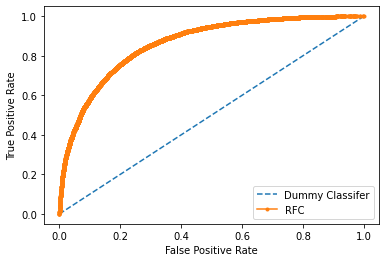

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = pipe.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RFC: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy Classifer')
plt.plot(lr_fpr, lr_tpr, marker='.', label='RFC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [29]:
#Let's plot a graph to identify the threshold influence on the scores

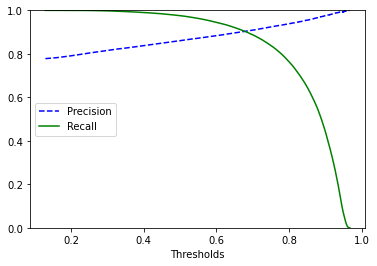

In [30]:
from sklearn.metrics import precision_recall_curve
y_scores = pipe.predict_proba(X_train)[:,1]
#y_scores

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_prc (precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Thresholds')
    plt.legend(loc='center left')
    plt.ylim([0,1])

plot_prc(precisions, recalls, thresholds)

In [31]:
#y_pred = clf.predict(X_test)  # default threshold is 0.5
y_pred1 = (pipe.predict_proba(X_train)[:,1] >= 0.8).astype(int) # set threshold as 0.3
precision_score(y_train, y_pred1)

0.9387124139881233